In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
uac = pd.read_csv("Unemployment and Crime.csv")

In [3]:
uac.head()

,Month,Year,Murder,Rape,Robbery,Assault,Burglary,Larceny,Vehicle_Theft,TotalCrime,Unemploy_Georgia,Nat_Unemploy
0,Jan,2013,56,139,1152,1736,7269,17968,2418,30738,0.091,0.080
1,Feb,2013,32,127,856,1328,5345,14844,1872,24404,0.086,0.077
2,Mar,2013,38,144,863,1685,5630,16621,2129,27110,0.082,0.075
3,Apr,2013,42,160,919,1709,6248,17401,2035,28514,0.079,0.076
4,May,2013,41,193,1128,1867,7103,19277,2105,31714,0.082,0.075


In [4]:
uac1 = uac[['Robbery', 'Unemploy_Georgia']]

In [5]:
uac1.head()

,Robbery,Unemploy_Georgia
0,1152,0.091
1,856,0.086
2,863,0.082
3,919,0.079
4,1128,0.082


## Test Assumptions

/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Robbery', ylabel='Density'>

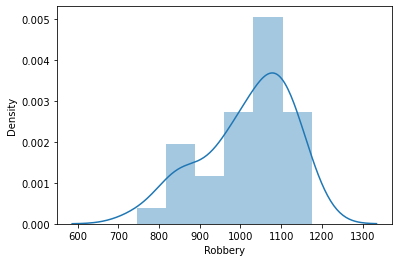

In [6]:
sns.distplot(uac1['Robbery'])

In [7]:
uac1['RobberySQRT'] = np.sqrt(uac1['Robbery'])

<ipython-input-7-c5879a77c8f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1['RobberySQRT'] = np.sqrt(uac1['Robbery'])


In [8]:
uac1.head()

,Robbery,Unemploy_Georgia,RobberySQRT
0,1152,0.091,33.941125
1,856,0.086,29.257478
2,863,0.082,29.376862
3,919,0.079,30.315013
4,1128,0.082,33.585711


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RobberySQRT', ylabel='Density'>

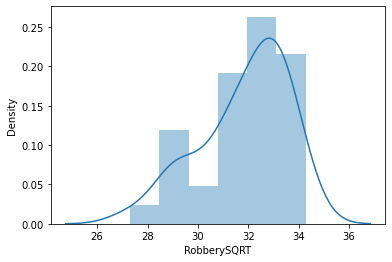

In [9]:
sns.distplot(uac1['RobberySQRT'])

In [10]:
scipy.stats.bartlett(uac1['RobberySQRT'], uac1['Unemploy_Georgia'])

BartlettResult(statistic=304.98845911302493, pvalue=2.697636677500592e-68)

In [11]:
scipy.stats.fligner(uac1['RobberySQRT'], uac1['Unemploy_Georgia'])

FlignerResult(statistic=45.51433386726547, pvalue=1.5152587111436103e-11)

## Sample Size

In [12]:
uac1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Robbery           36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   RobberySQRT       36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 992.0 bytes


## Independence

## Analysis

In [13]:
uac1.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [14]:
postHoc = MultiComparison(uac1['RobberySQRT'], uac1['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 0.054  0.057  -1.4913    0.9  -8.7801  5.7974  False
 0.054   0.06  -3.1635    0.9 -11.1479  4.8209  False
 0.054  0.061   0.1357    0.9  -9.6432  9.9146  False
 0.054  0.062   -1.951    0.9 -11.7298  7.8279  False
 0.054  0.063  -3.4594    0.9 -11.4438   4.525  False
 0.054  0.064   -1.483    0.9  -9.4674  6.5014  False
 0.054  0.066  -0.1157    0.9  -8.1001  7.8687  False
 0.054  0.067  -1.0845    0.9 -10.8634  8.6944  False
 0.054  0.069   1.0224    0.9  -8.7565 10.8012  False
 0.054  0.072  -0.1349    0.9  -9.9138  9.6439  False
 0.054  0.073  -1.1864    0.9  -8.4752  6.1023  False
 0.054  0.074  -1.3498    0.9 -11.1287  8.4291  False
 0.054  0.075  -4.5505 0.8644 -14.3294  5.2283  False
 0.054  0.076  -1.4852    0.9  -9.4696  6.4992  False
 0.054  0.079  -2.2791    0.9 -10.2635  5.7053  False
 0.054   0.08  -0.3855    0.

In [15]:
uac1.groupby('Unemploy_Georgia').mean()

,Robbery,RobberySQRT
Unemploy_Georgia,,
0.054,1106.000000,33.255912
0.057,1013.666667,31.764584
0.060,906.500000,30.092444
0.061,1115.000000,33.391616
0.062,980.000000,31.304952
0.063,894.000000,29.796513
0.064,1010.000000,31.772953
0.066,1098.500000,33.140219
0.067,1035.000000,32.171416
